## Decision Tree

In [ ]:
# import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=200
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### 1. Data Preparation:

In [2]:
df=pd.read_excel(r'C:\Users\sanket\Desktop\DS ASSIGNMENT\New folder\Decision Tree\Decision Tree\heart_disease.xlsx')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [3]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


### 2. Exploratory Data Analysis (EDA):

In [ ]:
# check for duplicates

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905    False
906    False
907    False
Length: 908, dtype: bool

In [6]:
df.duplicated().sum()

1

In [ ]:
# drop duplicate records

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(907, 13)

In [ ]:
# check for missing value

In [10]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,False,False,False,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,False,False,False
906,False,False,False,False,False,False,False,False,False,True,False,False,False


In [11]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [12]:
#Calculate the percentage of missig values in each column.
for i in df.isna().sum():
    print((i/len(df))*100,'%')

0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
0.0 %
6.835722160970231 %
0.0 %
0.0 %
0.0 %


In [ ]:
# fill the null values

In [13]:
oldpeak_median= df['oldpeak'].median()
oldpeak_median

0.5

In [14]:
df['oldpeak'].fillna(oldpeak_median, inplace=True)

In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [ ]:
# visualization

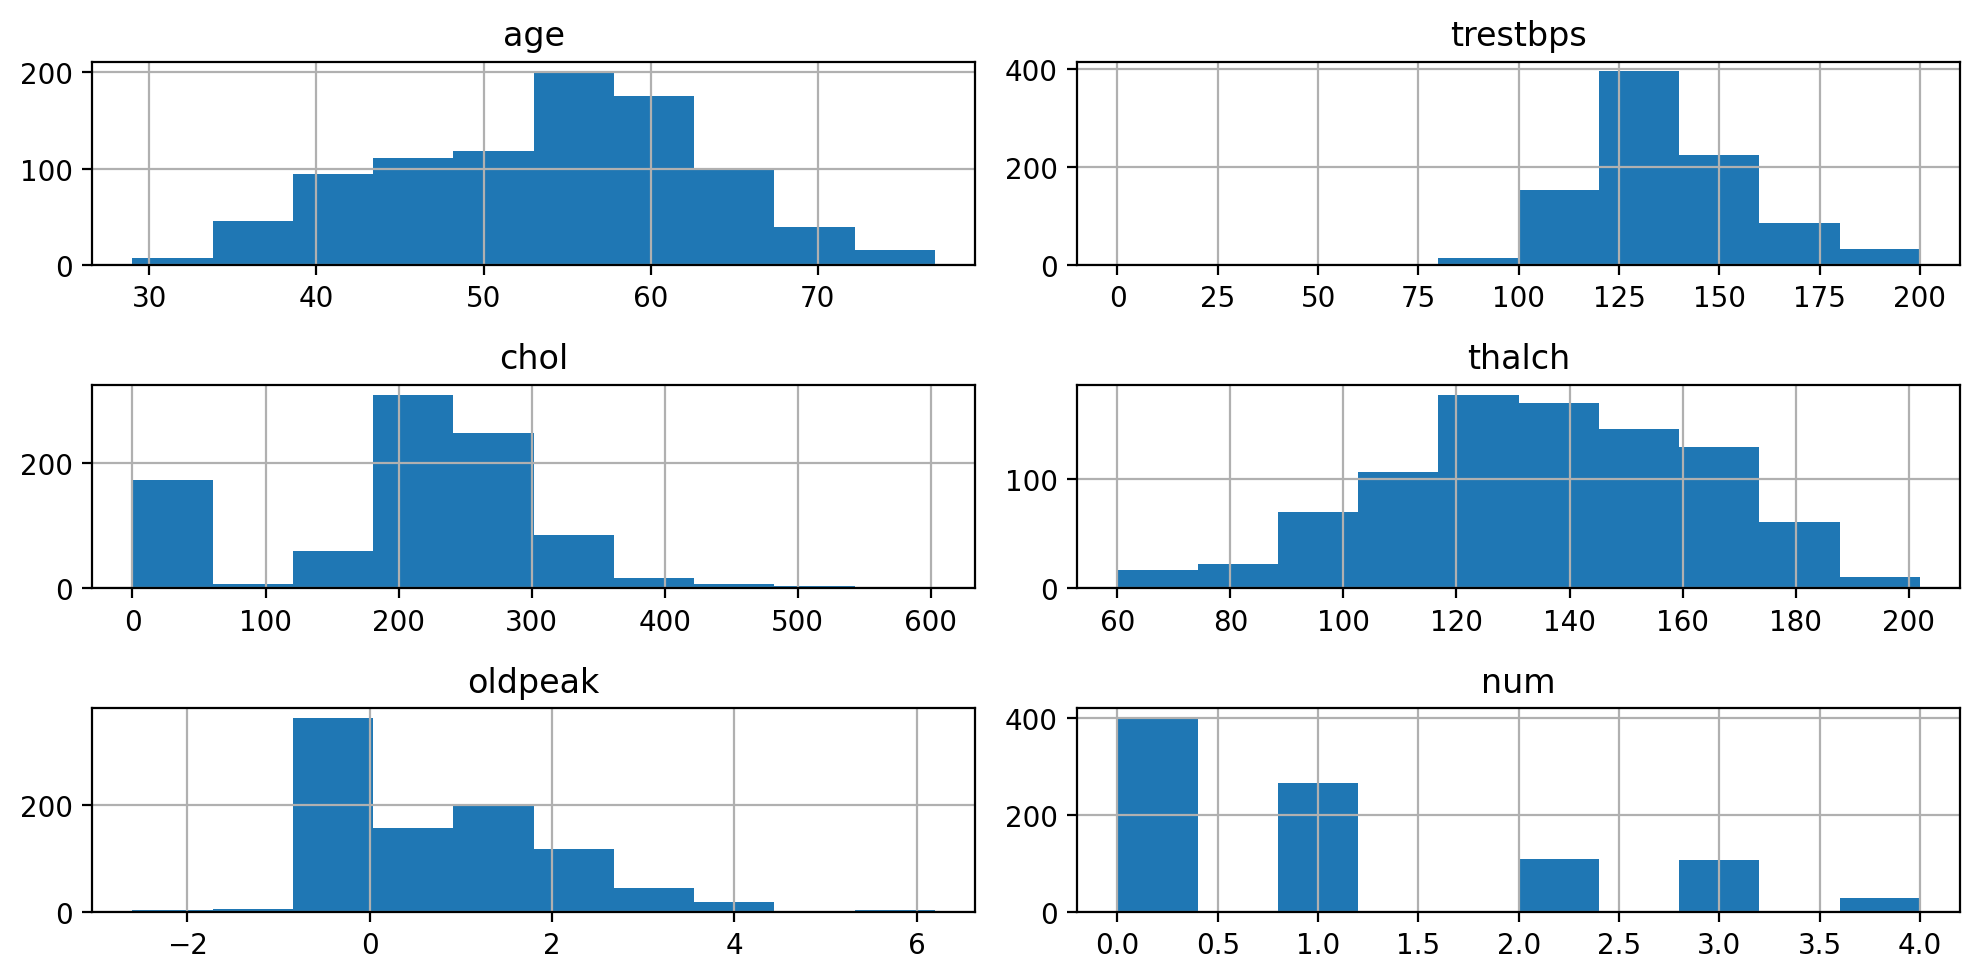

In [27]:
df.hist()
plt.tight_layout()

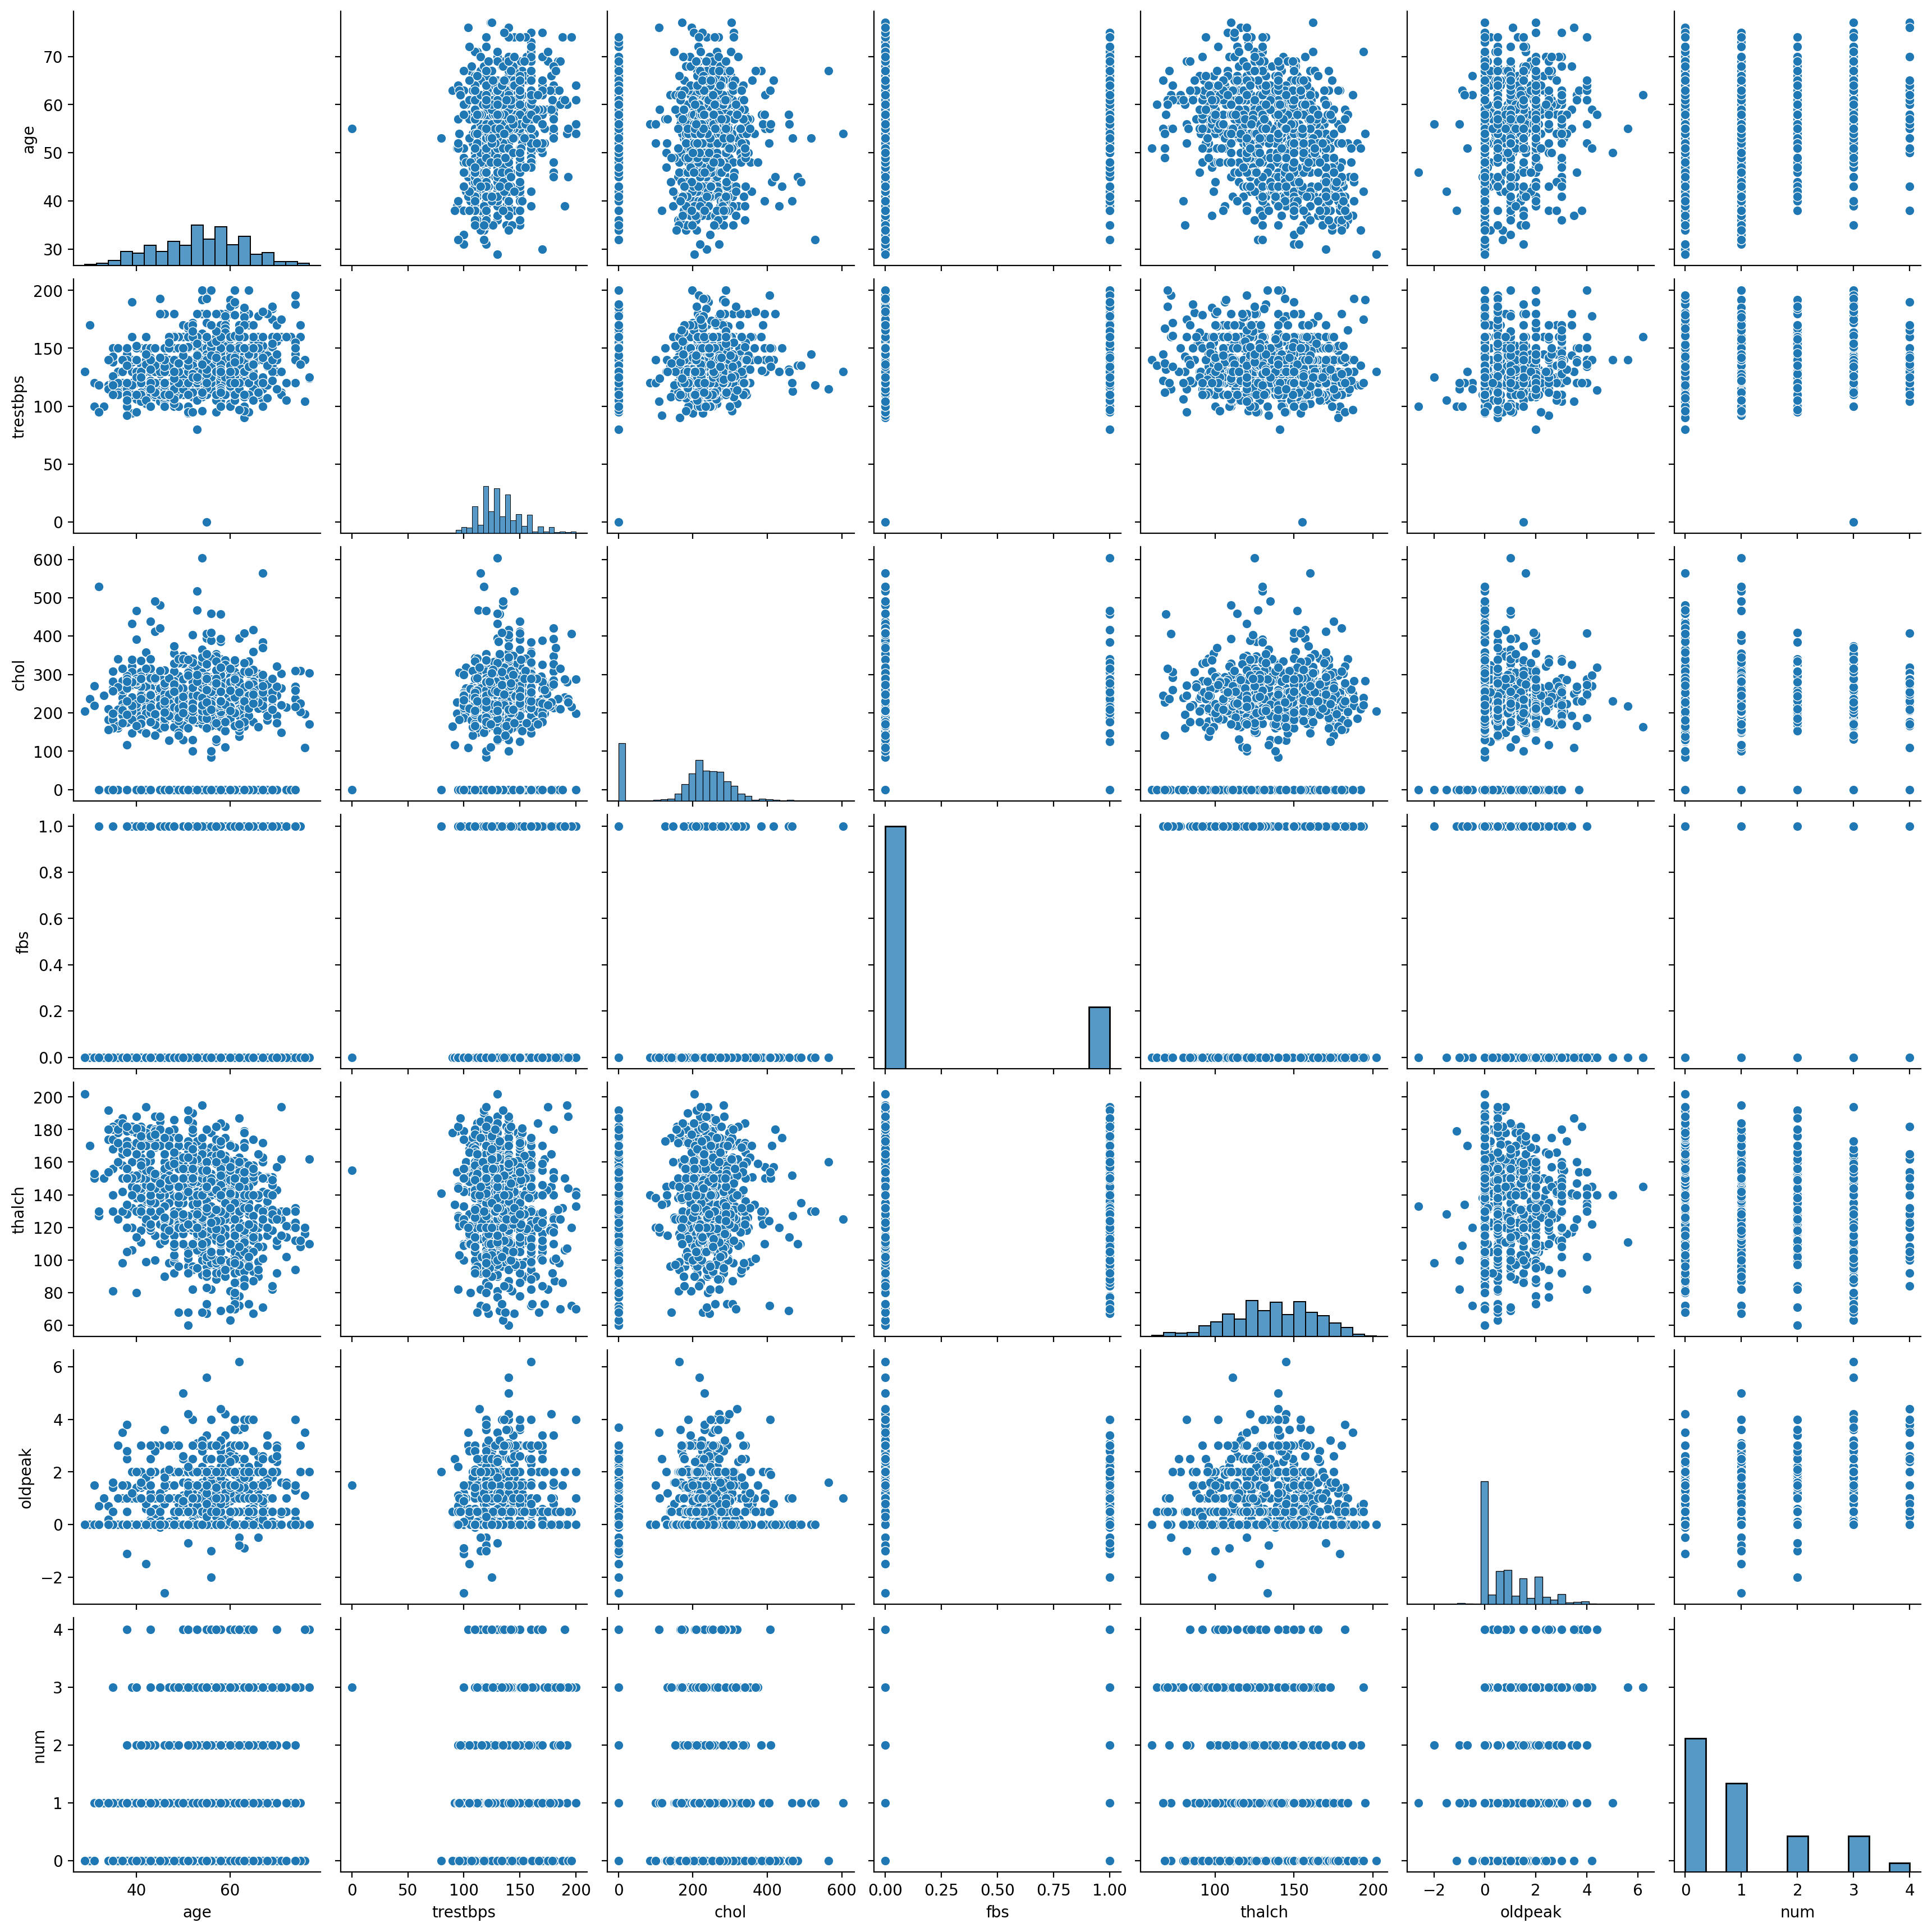

In [29]:
sns.pairplot(df)

### 3. Feature Engineering:

In [ ]:
# encoding categorical variables

In [16]:
from sklearn.preprocessing import  LabelEncoder

In [17]:
df.describe(include=object)

,sex,cp,restecg,exang,slope,thal
count,907,907,907,907,907,907
unique,2,4,3,4,3,3
top,Male,asymptomatic,normal,False,flat,normal
freq,717,495,542,516,453,363


In [ ]:
# Apply Label Encoding to Columns

In [18]:
data=df.select_dtypes(include=['object']).astype(str)
data

,sex,cp,restecg,exang,slope,thal
0,Male,typical angina,lv hypertrophy,False,downsloping,fixed defect
1,Male,atypical angina,normal,False,flat,fixed defect
2,Male,asymptomatic,normal,False,flat,fixed defect
3,Male,typical angina,lv hypertrophy,False,flat,fixed defect
4,Male,asymptomatic,normal,True,flat,fixed defect
...,...,...,...,...,...,...
903,Male,asymptomatic,normal,False,upsloping,fixed defect
904,Male,asymptomatic,st-t abnormality,True,flat,normal
905,Male,non-anginal,lv hypertrophy,True,downsloping,normal
906,Male,non-anginal,st-t abnormality,TURE,downsloping,normal


In [19]:
le= LabelEncoder()

In [20]:
for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [21]:
data

,sex,cp,restecg,exang,slope,thal
0,1,3,0,1,0,0
1,1,1,1,1,1,0
2,1,0,1,1,1,0
3,1,3,0,1,1,0
4,1,0,1,3,1,0
...,...,...,...,...,...,...
903,1,0,1,1,2,0
904,1,0,2,3,1,1
905,1,2,0,3,0,1
906,1,2,2,2,0,1


In [22]:
df = pd.concat([df, data], axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,sex,cp,restecg,exang,slope,thal
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0,1,3,0,1,0,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0,1,1,1,1,1,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0,1,0,1,1,1,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0,1,3,0,1,1,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0,1,0,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4,1,0,1,1,2,0
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,normal,4,1,0,2,3,1,1
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4,1,2,0,3,0,1
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,normal,4,1,2,2,2,0,1


In [23]:
df.drop(columns=['sex','cp','restecg','exang','slope','thal'],inplace=True)

In [24]:
df

,age,trestbps,chol,fbs,thalch,oldpeak,num
0,63,145,233,True,150,2.3,0
1,41,135,203,False,132,0.0,0
2,57,140,192,False,148,0.4,0
3,52,118,186,False,190,0.0,0
4,57,110,201,False,126,1.5,0
...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4
904,62,166,170,False,120,3.0,4
905,56,170,0,False,123,2.5,4
906,56,144,208,True,105,0.5,4


In [25]:
df = pd.concat([df, data], axis=1)
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex,cp,restecg,exang,slope,thal
0,63,145,233,True,150,2.3,0,1,3,0,1,0,0
1,41,135,203,False,132,0.0,0,1,1,1,1,1,0
2,57,140,192,False,148,0.4,0,1,0,1,1,1,0
3,52,118,186,False,190,0.0,0,1,3,0,1,1,0
4,57,110,201,False,126,1.5,0,1,0,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.5,4,1,0,1,1,2,0
904,62,166,170,False,120,3.0,4,1,0,2,3,1,1
905,56,170,0,False,123,2.5,4,1,2,0,3,0,1
906,56,144,208,True,105,0.5,4,1,2,2,2,0,1


In [26]:
df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

In [27]:
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex,cp,restecg,exang,slope,thal
0,63,145,233,1,150,2.3,0,1,3,0,1,0,0
1,41,135,203,0,132,0.0,0,1,1,1,1,1,0
2,57,140,192,0,148,0.4,0,1,0,1,1,1,0
3,52,118,186,0,190,0.0,0,1,3,0,1,1,0
4,57,110,201,0,126,1.5,0,1,0,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,1.5,4,1,0,1,1,2,0
904,62,166,170,0,120,3.0,4,1,0,2,3,1,1
905,56,170,0,0,123,2.5,4,1,2,0,3,0,1
906,56,144,208,1,105,0.5,4,1,2,2,2,0,1


In [28]:
num_to_category = {
    0: 'No disease',
    1: 'Stage 1',
    2: 'Stage 2',
    3: 'Stage 3',
    4: 'Stage 4'
}

In [29]:
df['num'] = df['num'].map(num_to_category)

In [30]:
df

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex,cp,restecg,exang,slope,thal
0,63,145,233,1,150,2.3,No disease,1,3,0,1,0,0
1,41,135,203,0,132,0.0,No disease,1,1,1,1,1,0
2,57,140,192,0,148,0.4,No disease,1,0,1,1,1,0
3,52,118,186,0,190,0.0,No disease,1,3,0,1,1,0
4,57,110,201,0,126,1.5,No disease,1,0,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,1.5,Stage 4,1,0,1,1,2,0
904,62,166,170,0,120,3.0,Stage 4,1,0,2,3,1,1
905,56,170,0,0,123,2.5,Stage 4,1,2,0,3,0,1
906,56,144,208,1,105,0.5,Stage 4,1,2,2,2,0,1


### 4. Decision Tree Classification:

In [ ]:
# here num is target column

In [31]:
y=df['num']
y

0      No disease
1      No disease
2      No disease
3      No disease
4      No disease
          ...    
903       Stage 4
904       Stage 4
905       Stage 4
906       Stage 4
907       Stage 4
Name: num, Length: 907, dtype: object

In [32]:
df.drop(columns=['num'],inplace=True)

In [33]:
df

,age,trestbps,chol,fbs,thalch,oldpeak,sex,cp,restecg,exang,slope,thal
0,63,145,233,1,150,2.3,1,3,0,1,0,0
1,41,135,203,0,132,0.0,1,1,1,1,1,0
2,57,140,192,0,148,0.4,1,0,1,1,1,0
3,52,118,186,0,190,0.0,1,3,0,1,1,0
4,57,110,201,0,126,1.5,1,0,1,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,1.5,1,0,1,1,2,0
904,62,166,170,0,120,3.0,1,0,2,3,1,1
905,56,170,0,0,123,2.5,1,2,0,3,0,1
906,56,144,208,1,105,0.5,1,2,2,2,0,1


In [ ]:
# scaling the data

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc=StandardScaler()
x=sc.fit_transform(df)

In [37]:
x

array([[ 1.00609656,  0.56818423,  0.28131786, ..., -0.77314675,
        -1.67627931, -1.5287018 ],
       [-1.39644661,  0.07784827,  0.01369116, ..., -0.77314675,
        -0.22691293, -1.5287018 ],
       [ 0.35085751,  0.32301625, -0.08443863, ..., -0.77314675,
        -0.22691293, -1.5287018 ],
       ...,
       [ 0.241651  ,  1.79402415, -1.79724952, ...,  1.26239492,
        -1.67627931, -0.20945106],
       [ 0.241651  ,  0.51915064,  0.05829561, ...,  0.24462408,
        -1.67627931, -0.20945106],
       [ 0.35085751,  0.42108344,  0.67383702, ..., -1.79091759,
        -0.22691293,  1.10979969]])

In [38]:
y

0      No disease
1      No disease
2      No disease
3      No disease
4      No disease
          ...    
903       Stage 4
904       Stage 4
905       Stage 4
906       Stage 4
907       Stage 4
Name: num, Length: 907, dtype: object

In [ ]:
#Split the dataset into training and testing sets 

In [39]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
xtrain

array([[-1.2872401 , -0.65765568,  0.83441304, ..., -0.77314675,
         1.22245345, -0.20945106],
       [-2.5977182 ,  1.79402415,  0.31700142, ..., -0.77314675,
        -1.67627931, -1.5287018 ],
       [ 0.46006402,  1.30368818,  0.08505828, ..., -0.77314675,
         1.22245345,  1.10979969],
       ...,
       [ 0.1324445 ,  1.89209134,  0.52218189, ..., -0.77314675,
        -1.67627931,  1.10979969],
       [ 0.35085751,  1.0094866 ,  0.27239697, ..., -0.77314675,
         1.22245345, -0.20945106],
       [ 0.67847703,  0.81335222,  0.34376409, ..., -0.77314675,
         1.22245345, -0.20945106]])

In [41]:
xtest

array([[-0.52279455,  0.17591546, -0.53048313, ..., -1.79091759,
        -0.22691293, -0.20945106],
       [ 0.46006402,  1.79402415, -1.79724952, ...,  1.26239492,
        -1.67627931, -0.20945106],
       [-1.39644661, -0.65765568,  0.79872948, ..., -0.77314675,
        -1.67627931, -0.20945106],
       ...,
       [-0.08596852,  0.32301625,  0.01369116, ...,  1.26239492,
        -1.67627931,  1.10979969],
       [ 0.02323799, -0.55958849,  0.75412503, ...,  1.26239492,
        -0.22691293, -0.20945106],
       [-0.95962058, -1.04992445, -0.36990711, ..., -0.77314675,
        -0.22691293, -0.20945106]])

In [42]:
ytrain

84     No disease
10     No disease
616       Stage 1
250    No disease
478       Stage 1
          ...    
106    No disease
270    No disease
861       Stage 3
435       Stage 1
102    No disease
Name: num, Length: 725, dtype: object

In [43]:
ytest

869       Stage 3
439       Stage 1
342    No disease
735       Stage 2
785       Stage 3
          ...    
598       Stage 1
868       Stage 3
445       Stage 1
786       Stage 3
25     No disease
Name: num, Length: 182, dtype: object

In [44]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
ypred

array(['No disease', 'Stage 1', 'No disease', 'Stage 2', 'Stage 1',
       'Stage 1', 'Stage 1', 'No disease', 'Stage 3', 'Stage 3',
       'Stage 2', 'Stage 2', 'No disease', 'No disease', 'Stage 1',
       'Stage 1', 'No disease', 'No disease', 'Stage 1', 'Stage 1',
       'No disease', 'Stage 1', 'Stage 1', 'Stage 1', 'Stage 1',
       'Stage 1', 'No disease', 'Stage 3', 'Stage 2', 'No disease',
       'No disease', 'Stage 1', 'No disease', 'Stage 1', 'No disease',
       'No disease', 'Stage 3', 'Stage 2', 'No disease', 'Stage 3',
       'Stage 1', 'No disease', 'Stage 2', 'No disease', 'Stage 1',
       'No disease', 'No disease', 'No disease', 'No disease', 'Stage 3',
       'Stage 1', 'Stage 4', 'No disease', 'Stage 1', 'No disease',
       'No disease', 'Stage 3', 'No disease', 'Stage 3', 'Stage 4',
       'Stage 1', 'No disease', 'Stage 1', 'Stage 1', 'No disease',
       'Stage 2', 'Stage 2', 'Stage 2', 'Stage 3', 'No disease',
       'No disease', 'No disease', 'Stage 3', 'S

In [45]:
dt.feature_importances_

array([0.12652095, 0.13361237, 0.15506553, 0.02336228, 0.12198384,
       0.13914683, 0.01271454, 0.10323576, 0.05360777, 0.03800156,
       0.05091894, 0.04182964])

In [ ]:
# model evaluation

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

  No disease       0.72      0.72      0.72        89
     Stage 1       0.44      0.49      0.46        47
     Stage 2       0.22      0.20      0.21        20
     Stage 3       0.06      0.06      0.06        17
     Stage 4       0.00      0.00      0.00         9

    accuracy                           0.51       182
   macro avg       0.29      0.29      0.29       182
weighted avg       0.50      0.51      0.50       182



In [48]:
confusion_matrix(ytest,ypred)

array([[64, 14,  5,  5,  1],
       [15, 23,  3,  4,  2],
       [ 3,  8,  4,  4,  1],
       [ 5,  7,  2,  1,  2],
       [ 2,  0,  4,  3,  0]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(ytest,ypred)

0.5054945054945055

In [51]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', dt.score(xtest,ytest))

Training accuracy:  1.0
Testing Accuracy:  0.5054945054945055


### 5. Hyperparameter Tuning:

In [52]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [1,2,3,4,5,6,7,8,9],
    'splitter' :['best','random']
}

In [55]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,
                   verbose=1)

In [56]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [60]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}

In [61]:
dtc= DecisionTreeClassifier(criterion='entropy',max_depth=5,splitter='random')

In [62]:
dtc.fit(xtrain,ytrain)
ypred_ = dtc.predict(xtest)

In [63]:
ypred_

array(['No disease', 'Stage 1', 'No disease', 'Stage 1', 'Stage 1',
       'Stage 1', 'No disease', 'No disease', 'No disease', 'Stage 1',
       'Stage 2', 'No disease', 'No disease', 'No disease', 'No disease',
       'Stage 1', 'No disease', 'No disease', 'Stage 1', 'Stage 1',
       'No disease', 'No disease', 'Stage 3', 'Stage 1', 'Stage 1',
       'Stage 1', 'No disease', 'Stage 1', 'No disease', 'No disease',
       'No disease', 'Stage 1', 'No disease', 'No disease', 'No disease',
       'Stage 1', 'Stage 1', 'No disease', 'No disease', 'Stage 3',
       'No disease', 'No disease', 'No disease', 'No disease', 'Stage 1',
       'No disease', 'No disease', 'No disease', 'No disease',
       'No disease', 'Stage 2', 'Stage 1', 'No disease', 'Stage 2',
       'No disease', 'No disease', 'Stage 1', 'Stage 1', 'Stage 3',
       'Stage 3', 'Stage 1', 'No disease', 'Stage 1', 'No disease',
       'No disease', 'No disease', 'Stage 1', 'No disease', 'No disease',
       'No disease', 'N

### 6. Model Evaluation and Analysis:

In [64]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

  No disease       0.72      0.72      0.72        89
     Stage 1       0.44      0.49      0.46        47
     Stage 2       0.22      0.20      0.21        20
     Stage 3       0.06      0.06      0.06        17
     Stage 4       0.00      0.00      0.00         9

    accuracy                           0.51       182
   macro avg       0.29      0.29      0.29       182
weighted avg       0.50      0.51      0.50       182



In [65]:
confusion_matrix(ytest,ypred)

array([[64, 14,  5,  5,  1],
       [15, 23,  3,  4,  2],
       [ 3,  8,  4,  4,  1],
       [ 5,  7,  2,  1,  2],
       [ 2,  0,  4,  3,  0]], dtype=int64)

In [66]:
dtc.score(xtrain,ytrain),dtc.score(xtest,ytest)

(0.5972413793103448, 0.5604395604395604)

In [ ]:
#Visualize the decision tree

In [67]:
from sklearn import tree

In [68]:
df.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'sex', 'cp',
       'restecg', 'exang', 'slope', 'thal'],
      dtype='object')

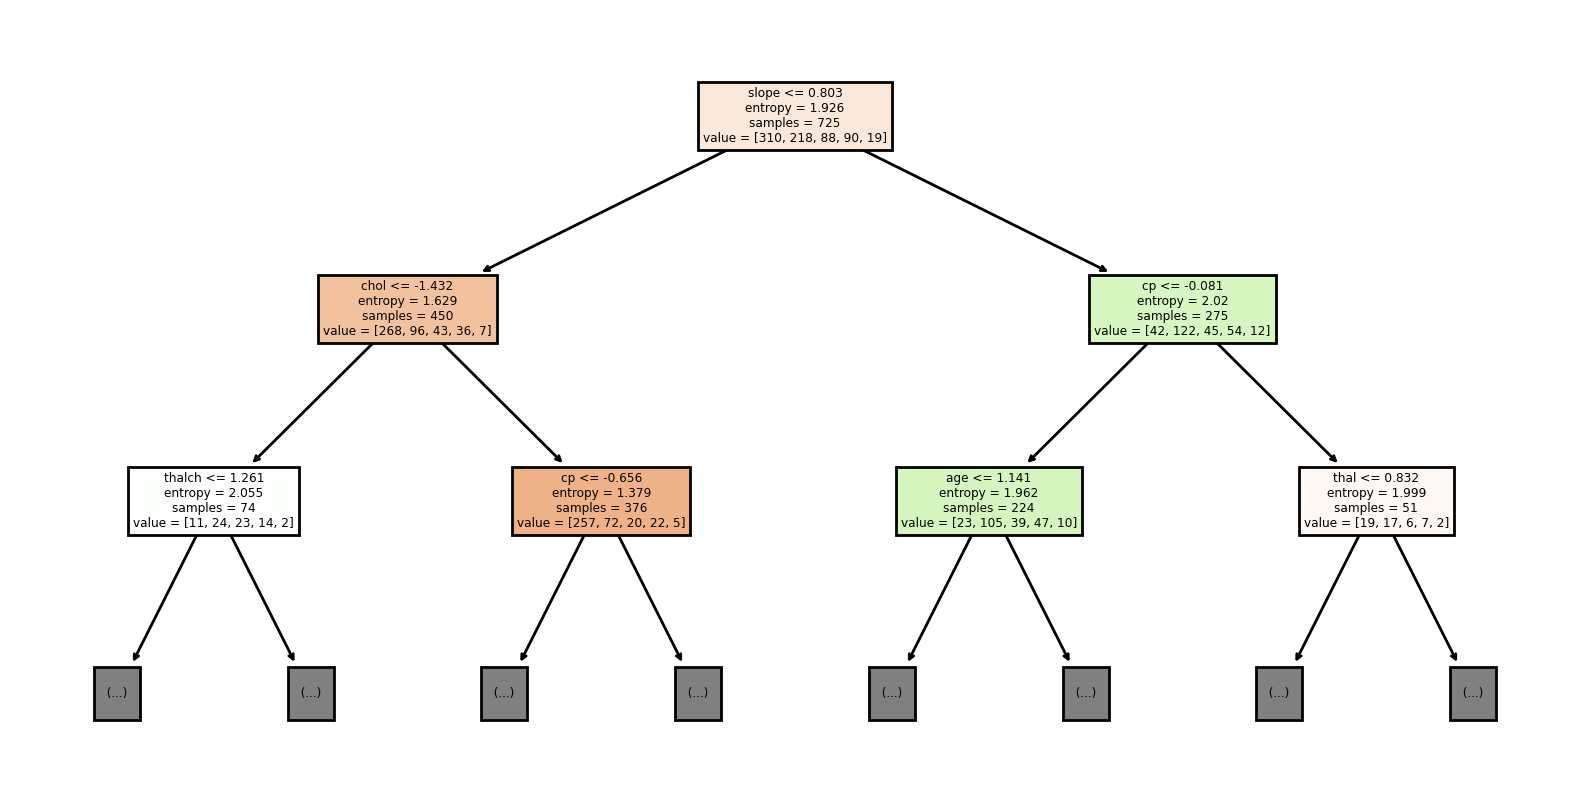

In [73]:
tree.plot_tree(dtc, feature_names=['age','trestbps','chol','fbs','thalch','oldpeak','sex','cp','restecg	exang','slope','thal'],filled=True, max_depth =2)
plt.show()